<img src='https://training.dwit.edu.np/frontend/images/computer-training-institute.png'>
<h1>Data Science and Machine learning in Python</h1>
<h3>Instructor: <a href='https://www.kaggle.com/atishadhikari'> Atish Adhikari</a></h3>
<hr>

### Transfer Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.layers import GlobalAvgPool2D, Conv2D, Dropout, MaxPool2D

from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [3]:
from tensorflow.keras.applications import InceptionResNetV2

In [4]:
training_path = "large_datasets/10-monkey-species/training/"
testing_path = "large_datasets/10-monkey-species/validation/"

In [5]:
from PIL import Image

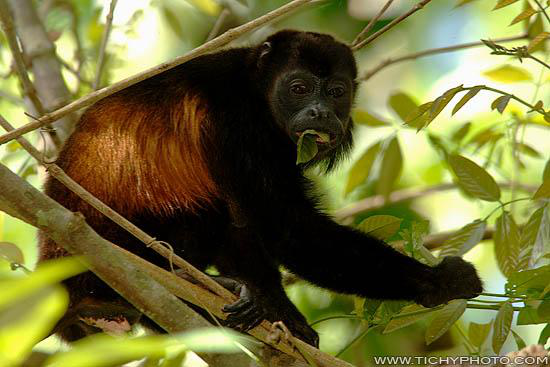

In [6]:
Image.open("large_datasets/10-monkey-species/training/n0/n0018.jpg")

### Load model without last Fully-Connected Layers

In [7]:
base_model = InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(299,299,3))

In [8]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

activation_163 (Activation)     (None, 8, 8, 192)    0           batch_normalization_163[0][0]    
__________________________________________________________________________________________________
activation_166 (Activation)     (None, 8, 8, 256)    0           batch_normalization_166[0][0]    
__________________________________________________________________________________________________
block8_1_mixed (Concatenate)    (None, 8, 8, 448)    0           activation_163[0][0]             
                                                                 activation_166[0][0]             
__________________________________________________________________________________________________
block8_1_conv (Conv2D)          (None, 8, 8, 2080)   933920      block8_1_mixed[0][0]             
__________________________________________________________________________________________________
block8_1 (Lambda)               (None, 8, 8, 2080)   0           mixed_7a[0][0]                   
          

In [9]:
base_model.output

<tf.Tensor 'conv_7b_ac/Identity:0' shape=(None, 8, 8, 1536) dtype=float32>

### Attach new layers to base model

In [10]:
gap_layer = GlobalAvgPool2D() (base_model.output)

dense_layer_1 = Dense(512, activation="relu") (gap_layer)
dense_layer_2 = Dense(256, activation="relu") (dense_layer_1)
output_layer = Dense(10, activation="softmax") (dense_layer_2)

In [11]:
inception_cnn = Model(base_model.input, output_layer)

### Make layers non-trainable depending upon dataset

In [12]:
for layer in inception_cnn.layers[:-6]:
    layer.trainable = False

In [15]:
inception_cnn.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

Total params: 55,257,578
Trainable params: 922,378
Non-trainable params: 54,335,200
__________________________________________________________________________________________________


In [14]:
inception_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Loading Data with Generator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
generator = ImageDataGenerator(rescale=1/255, horizontal_flip=True)

In [18]:
training_instances = generator.flow_from_directory(training_path, target_size=(299, 299), batch_size=32)

test_instances = generator.flow_from_directory(testing_path, target_size=(299, 299), batch_size=32)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [19]:
inception_cnn.fit(training_instances, steps_per_epoch=1098//32, epochs=2)

Epoch 1/2
34/34 [==============================] - 258s 8s/step - loss: 0.3981 - accuracy: 0.8780
Epoch 2/2
34/34 [==============================] - 251s 7s/step - loss: 0.1129 - accuracy: 0.9719


In [21]:
inception_cnn.evaluate(test_instances)

9/9 [==============================] - 61s 7s/step - loss: 0.0661 - accuracy: 0.9779


[0.06606891751289368, 0.9779411554336548]

### Test on Random Image 

In [27]:
img = load_img("large_datasets/10-monkey-species/validation/n4/n4012.jpg", target_size=(299,299,3))

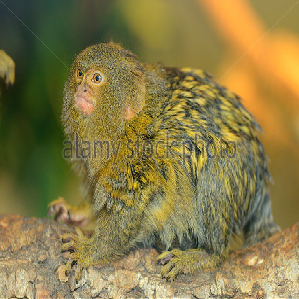

In [28]:
img

In [29]:
img_arr = img_to_array(img)

img_arr = img_arr.reshape(1, 299, 299, 3) / 255

In [30]:
y_pred = inception_cnn.predict(img_arr)

In [31]:
y_pred.round(2)
#Class 4 <- Correct 

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)